In [1]:
%matplotlib inline
%autosave 0
%load_ext autoreload
%autoreload 2

Autosave disabled


In [2]:
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtrace import rpath, dpath, logger
from dtrace.DTracePlot import DTracePlot
from dtrace.Associations import Association
from dtrace.DataImporter import KinobeadCATDS
from dtrace.TargetBenchmark import TargetBenchmark
from dtrace.DTraceEnrichment import DTraceEnrichment

### Import data-sets and associations

In [19]:
assoc = Association(dtype="ic50", load_associations=True, load_ppi=True)

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (6,28) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


[2019-02-25 23:14:18,508 - INFO]: #(Samples)=500
[2019-02-25 23:14:20,915 - INFO]: #(Drugs)=589; #(Genes)=16818; #(Genomic)=536; 
[2019-02-25 23:15:14,336 - INFO]: ENSP gene map: 19114
[2019-02-25 23:15:36,911 - INFO]: String: 410502
[2019-02-25 23:15:37,775 - INFO]: IGRAPH UN-- 10587 205251 -- 
+ attr: name (v), score (e)
[2019-02-25 23:15:39,769 - INFO]: IGRAPH UN-- 9639 174078 -- 
+ attr: name (v), corr (e), score (e)


In [21]:
target = TargetBenchmark(assoc=assoc, fdr=0.1)

## Drug-response and gene-essentiality associations

Top associations between drug-response and gene-essentiality

In [5]:
assoc.lmm_drug_crispr.head(15)

,DRUG_ID,DRUG_NAME,VERSION,beta,pval,GeneSymbol,n_samples,fdr,DRUG_TARGETS,target_detailed,target
0,1956,MCL1_1284,RS,0.515118,5.695624e-38,MCL1,409,9.578900e-34,MCL1,T,T
1,1946,MCL1_5526,RS,0.501908,2.487679e-36,MCL1,409,4.183779e-32,MCL1,T,T
2,2354,MCL1_8070,RS,0.511217,2.538420e-36,MCL1,402,4.269115e-32,MCL1,T,T
3,2127,Mcl1_6386,RS,0.506734,9.873072e-36,MCL1,404,1.660453e-31,MCL1,T,T
4,1510,Linsitinib,RS,0.514663,3.305848e-35,IGF1R,424,5.559775e-31,IGF1R,T,T
5,1560,Alpelisib,RS,0.493049,4.878441e-35,PIK3CA,423,8.204562e-31,PIK3CA,T,T
6,2235,AZD5991,RS,0.492656,1.389552e-34,MCL1,406,2.336948e-30,MCL1,T,T
7,2125,Mcl1_7350,RS,0.447086,8.420030e-33,MCL1,406,1.416081e-28,MCL1,T,T
8,1114,Cetuximab,v17,0.535663,3.637161e-32,EGFR,443,6.116978e-28,EGFR,T,T
9,1373,Dabrafenib,RS,0.511496,2.906300e-31,BRAF,413,4.887815e-27,BRAF,T,T


Top associations between drug-response and gene-expression

In [6]:
assoc.lmm_drug_gexp.head(15)

,DRUG_ID,DRUG_NAME,VERSION,beta,pval,GeneSymbol,n_samples,fdr,DRUG_TARGETS,target_detailed,target
0,2013,CDK12_8969,RS,0.577209,4.033352e-33,ABCB1,350,6.198455e-29,CDK12,2,2
1,1190,Gemcitabine,RS,-0.371649,1.078964e-16,SLFN11,355,1.658152e-12,NaN,No link; No drug target information,-
2,1026,Tanespimycin,v17,-0.580015,1.273189e-16,NQO1,373,1.956637e-12,HSP90AB1;HSP90AA1,3,3
3,1003,Camptothecin,RS,-0.345473,1.613004e-16,SLFN11,369,2.478865e-12,TOP1,No link; Gene not in network,-
4,2282,Romidepsin,RS,0.474407,1.470452e-15,ABCB1,350,2.259790e-11,HDAC3;HDAC8;HDAC2;HDAC1,2,2
5,1047,Nutlin-3a (-),v17,-0.382465,5.148693e-15,MDM2,373,7.912512e-11,MDM2,T,T
6,1047,Nutlin-3a (-),RS,-0.295997,6.797557e-15,MDM2,358,1.026503e-10,MDM2,T,T
7,1047,Nutlin-3a (-),RS,-0.329031,1.335897e-14,CDKN1A,358,1.026503e-10,MDM2,1,1
8,1411,SN1041137233,v17,-0.356086,7.841626e-15,MIEN1,415,1.205101e-10,EGFR,No link; Gene not in network,-
9,1941,Sepantronium bromide,RS,-0.429464,1.019312e-14,SLC35F2,352,1.566479e-10,BIRC5,No link; Gene not in network,-


Manhattan plot of the drug-gene associations, x-axis represents the gene genomic coordinate (obtained from the sgRNAs)
and y-axis represent the -log10 association p-value.

Spikes on the same genomic location represent associations with multiple inhibitors with the same target/
mode-of-action.

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/eg14/anaconda3/envs/crispy/lib/py

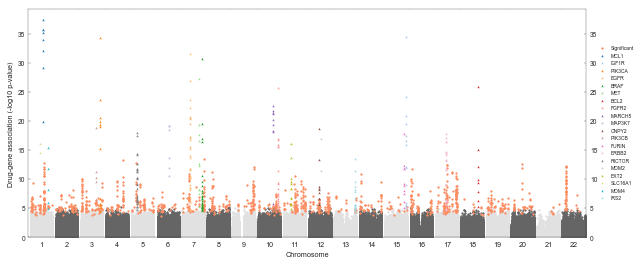

In [7]:
target.manhattan_plot(n_genes=20)
plt.gcf().set_size_inches(10, 4.2)
plt.savefig(
    f"{rpath}/drug_associations_manhattan.png",
    bbox_inches="tight",
    transparent=True,
    dpi=300,
)

Volcano plot of the significant associations.

/Users/eg14/Projects/dtrace/dtrace/TargetBenchmark.py:1040: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  MinMaxScaler().fit_transform(plot_df[["beta"]].abs())[:, 0] * 10 + 1


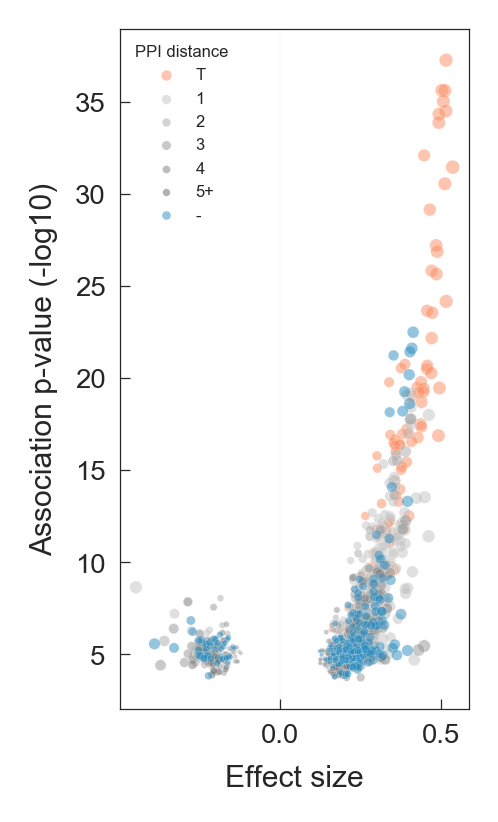

In [8]:
plt.figure(figsize=(10, 20), dpi=300)
target.signif_volcano()
plt.gcf().set_size_inches(1.5, 3)
plt.savefig(
    f"{rpath}/target_benchmark_volcano.pdf", bbox_inches="tight", transparent=True
)

Top 50 most strongly correlated drugs

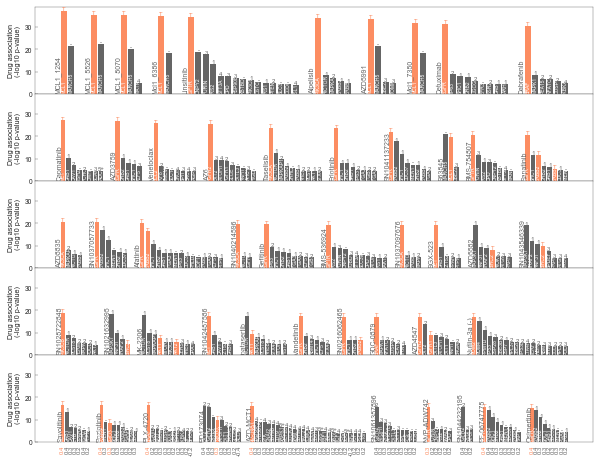

In [22]:
target.top_associations_barplot()
plt.savefig(
    f"{rpath}/target_benchmark_associations_barplot.pdf",
    bbox_inches="tight",
    transparent=True,
)

Representative examples of the drug-gene associations.

In [23]:
dgs = [
    ("Alpelisib", "PIK3CA"),
    ("Nutlin-3a (-)", "MDM2"),
    ("MCL1_1284", "MCL1"),
    ("MCL1_1284", "MARCH5"),
    ("Venetoclax", "BCL2"),
    ("AZD4320", "BCL2"),
    ("Volasertib", "PLK1"),
    ("Rigosertib", "PLK1"),
    ('Linsitinib', 'CNPY2'),
]

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


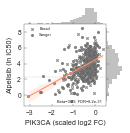

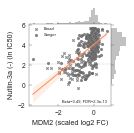

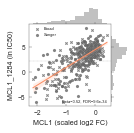

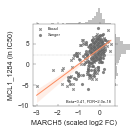

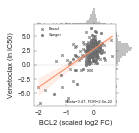

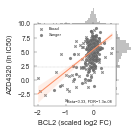

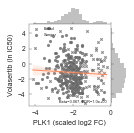

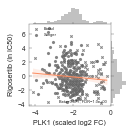

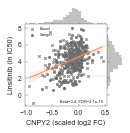

In [24]:
for dg in dgs:
    pair = assoc.by(assoc.lmm_drug_crispr, drug_name=dg[0], gene_name=dg[1]).iloc[0]

    drug = tuple(pair[assoc.dcols])

    dmax = np.log(assoc.drespo_obj.maxconcentration[drug])
    annot_text = f"Beta={pair['beta']:.2g}, FDR={pair['fdr']:.1e}"

    plot_df = pd.concat(
        [
            assoc.drespo.loc[drug].rename("drug"),
            assoc.crispr.loc[dg[1]].rename("crispr"),
            assoc.crispr_obj.institute.rename("Institute"),
        ],
        axis=1,
        sort=False,
    ).dropna()

    g = DTracePlot.plot_corrplot(
        "crispr",
        "drug",
        "Institute",
        plot_df,
        add_hline=False,
        add_vline=False,
        annot_text=annot_text,
    )
    g.ax_joint.axhline(
        y=dmax, linewidth=0.3, color=DTracePlot.PAL_DTRACE[2], ls=":", zorder=0
    )
    g.set_axis_labels(f"{dg[1]} (scaled log2 FC)", f"{dg[0]} (ln IC50)")
    plt.gcf().set_size_inches(1.5, 1.5)
    plt.savefig(
        f"{rpath}/association_drug_scatter_{dg[0]}_{dg[1]}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

Kinobeads drug-protein affinity measurements for 84 kinase inhibitors were obtained from an independent study [1] as
aparent pKd (nM). These were ploted for the signifincant associations versus non-significant (Log-ratio test BH-FDR)
found in our study.


[1] Klaeger S, Heinzlmeir S, Wilhelm M, Polzer H, Vick B, Koenig P-A, Reinecke M, Ruprecht B, Petzoldt S, Meng C,
Zecha J, Reiter K, Qiao H, Helm D, Koch H, Schoof M, Canevari G, Casale E, Depaolini SR, Feuchtinger A, et al. (2017)
The target landscape of clinical kinase drugs. Science 358: eaan4368

[2019-02-26 08:42:50,414 - INFO]: Mann-Whitney U statistic=9705.50, p-value=1.45e-06


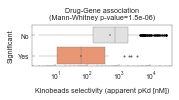

In [25]:
target.boxplot_kinobead()
plt.gcf().set_size_inches(2.5, 0.75)
plt.savefig(
    f"{rpath}/target_benchmark_kinobeads.pdf", bbox_inches="tight", transparent=True
)

Association effect sizes with between drugs and their know targets

[2019-02-26 08:43:09,334 - INFO]: Mann-Whitney U statistic=2547282311.00, p-value=1.12e-109


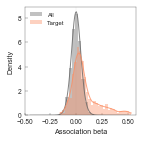

In [26]:
target.beta_histogram()
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/target_benchmark_beta_histogram.pdf", bbox_inches="tight", transparent=True
)

P-value histogram of the Drug-Genes associations highlighting Drug-Target associations.

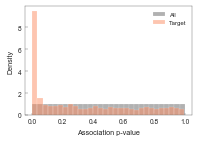

In [28]:
target.pval_histogram()
plt.gcf().set_size_inches(3, 2)
plt.savefig(
    f"{rpath}/target_benchmark_pval_histogram.pdf", bbox_inches="tight", transparent=True
)

Distribution of the signifcant Drug-Gene associations across a protein-protein interaction network, with
gene-essentiality and gene-expression.

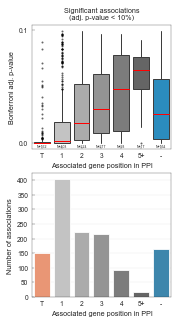

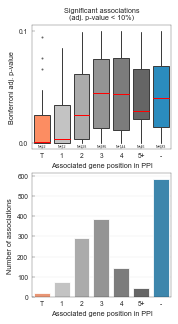

In [29]:
for dtype in ["crispr", "gexp"]:

    fig, axs = plt.subplots(2, 1)

    # Boxplot
    target.drugs_ppi(dtype, ax=axs[0])

    axs[0].set_xlabel("Associated gene position in PPI")
    axs[0].set_ylabel("Bonferroni adj. p-value")
    axs[0].set_title("Significant associations\n(adj. p-value < 10%)")

    # Count plot
    target.drugs_ppi_countplot(dtype, ax=axs[1])

    axs[1].set_xlabel("Associated gene position in PPI")
    axs[1].set_ylabel("Number of associations")

    plt.gcf().set_size_inches(2.5, 5)
    plt.savefig(
        f"{rpath}/target_benchmark_ppi_distance_{dtype}.pdf",
        bbox_inches="tight",
        transparent=True,
    )

Background distribution of all Drug-Gene associations tested.

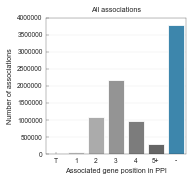

In [30]:
target.drugs_ppi_countplot_background()
plt.gcf().set_size_inches(2.5, 2.5)
plt.savefig(
    f"{rpath}/target_benchmark_ppi_distance_{dtype}_countplot_bkg.pdf",
    bbox_inches="tight",
    transparent=True,
)

Breakdown numbers of (i) all the drugs screened, (ii) unique drugs, (iii) their annotation status, and (iv) those
which at least one of the canonical targets were targeted with the CRISPR-Cas9 screen.

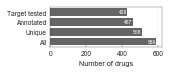

In [31]:
target.countplot_drugs()
plt.gcf().set_size_inches(2, 0.75)
plt.savefig(
    f"{rpath}/target_benchmark_association_countplot.pdf",
    bbox_inches="tight",
    transparent=True,
)

Histogram of drugs with at least one significant association across the protein-protein network

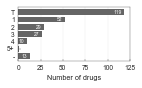

In [32]:
target.countplot_drugs_significant()
plt.gcf().set_size_inches(2, 1)
plt.savefig(
    f"{rpath}/target_benchmark_association_signif_countplot.pdf",
    bbox_inches="tight",
    transparent=True,
)

Pie chart of significant associations per unique durgs ordered by distance in the PPI

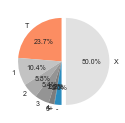

In [33]:
target.pichart_drugs_significant()
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/target_benchmark_association_signif_piechart.pdf",
    bbox_inches="tight",
    transparent=True,
)

Heatmap counting the number of drugs which have a significant association with CRISPR and/or target a core-essential
gene.

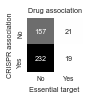

In [34]:
target.signif_essential_heatmap()
plt.gcf().set_size_inches(1, 1)
plt.savefig(
    f"{rpath}/target_benchmark_signif_essential_heatmap.pdf",
    bbox_inches="tight",
    transparent=True,
)

Number of significant associations found with drugs from the two different types of screening proceedures, i.e. RS
and V17.

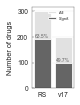

In [35]:
target.signif_per_screen()
plt.gcf().set_size_inches(0.75, 1.5)
plt.savefig(
    f"{rpath}/target_benchmark_significant_by_screen.pdf",
    bbox_inches="tight",
    transparent=True,
)

Heatmap counting the number of drugs which have a significant association with CRISPR and/or with a genomic marker

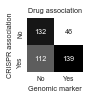

In [36]:
target.signif_genomic_markers()
plt.gcf().set_size_inches(1, 1)
plt.savefig(
    f"{rpath}/target_benchmark_signif_genomic_heatmap.pdf",
    bbox_inches="tight",
    transparent=True,
)

Significant associations p-value (y-axis) spread across the number of times a drug displayed an IC50 lower than the
maximum screened concentration.

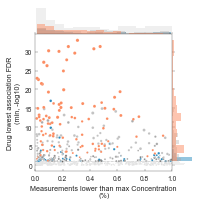

In [37]:
target.signif_maxconcentration_scatter()
plt.gcf().set_size_inches(2.5, 2.5)
plt.savefig(
    f"{rpath}/target_benchmark_signif_scatter_maxconcentration.pdf",
    bbox_inches="tight",
    transparent=True,
)

Drug-Gene CRISPR associations p-value (-log10) versus Drug-Genomic associations p-value (-log10).

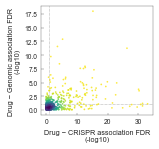

In [38]:
target.signif_fdr_scatter()
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/target_benchmark_signif_fdr_scatter.pdf",
    bbox_inches="tight",
    transparent=True,
)

Top associaitons 

In [39]:
drugs = [
    "SN1021632995",
    "AZD5582",
    "SN1043546339",
    "VE-821",
    "AZ20",
    "VE821",
    "VX-970",
    "AZD6738",
    "VE-822",
]

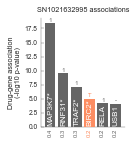

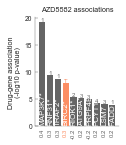

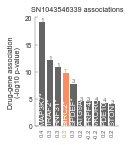

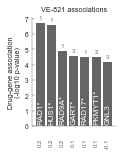

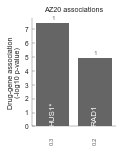

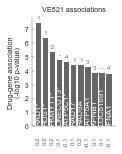

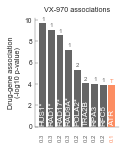

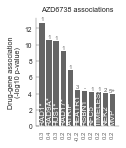

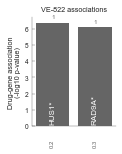

In [40]:
for d in drugs:
    target.drug_top_associations(d, fdr_thres=0.25)
    plt.gcf().set_size_inches(1.5, 2)
    plt.savefig(
        f"{rpath}/target_benchmark_{d}_top_associations_barplot.pdf",
        bbox_inches="tight",
        transparent=True,
        dpi=600,
    )
    plt.show()

PARP inhibitors (olaparib and talazoparib) associations

In [41]:
genes = ["STAG1", "LIG1", "FLI1", "PARP1", "PARP2", "PARP3", "PCGF5", "XRCC1", "RHNO1"]

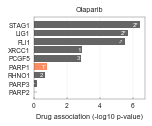

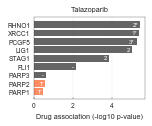

In [42]:
for drug in ["Olaparib", "Talazoparib"]:
    target.drug_notarget_barplot(drug, genes)

    plt.gcf().set_size_inches(2, 1.5)
    plt.savefig(
        f"{rpath}/target_benchmark_drug_notarget_{drug}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

Clustermap of drug association betas

In [43]:
betas_crispr = pd.pivot_table(
    assoc.lmm_drug_crispr.query("VERSION == 'RS'"),
    index=["DRUG_ID", "DRUG_NAME"],
    columns="GeneSymbol",
    values="beta",
)

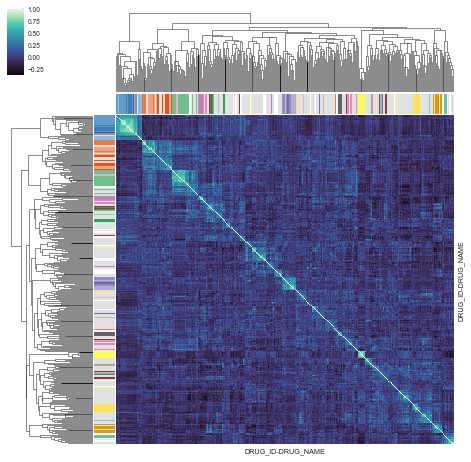

In [44]:
target.lmm_betas_clustermap(betas_crispr)
plt.gcf().set_size_inches(8, 8)
plt.savefig(
    f"{rpath}/target_benchmark_clustermap_betas_crispr.png", bbox_inches="tight", dpi=300
)

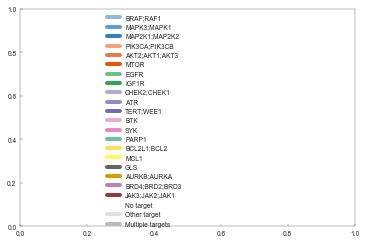

In [45]:
target.lmm_betas_clustermap_legend()
plt.savefig(
    f"{rpath}/target_benchmark_clustermap_betas_crispr_legend.pdf", bbox_inches="tight"
)

Drug association with gene-expression

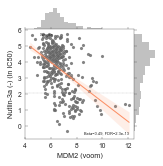

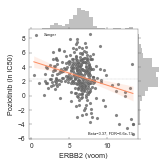

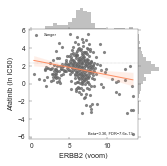

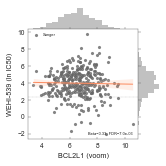

In [47]:
dgs = [
    ("Nutlin-3a (-)", "MDM2"),
    ("Poziotinib", "ERBB2"),
    ("Afatinib", "ERBB2"),
    ("WEHI-539", "BCL2L1"),
]
for dg in dgs:
    pair = assoc.by(assoc.lmm_drug_crispr, drug_name=dg[0], gene_name=dg[1]).iloc[0]

    drug = tuple(pair[assoc.dcols])

    dmax = np.log(assoc.drespo_obj.maxconcentration[drug])
    annot_text = f"Beta={pair['beta']:.2g}, FDR={pair['fdr']:.1e}"

    plot_df = pd.concat(
        [assoc.drespo.loc[drug].rename("drug"), assoc.gexp.loc[dg[1]].rename("crispr")],
        axis=1,
        sort=False,
    ).dropna()
    plot_df["Institute"] = "Sanger"

    g = DTracePlot.plot_corrplot(
        "crispr", "drug", "Institute", plot_df, add_hline=False, add_vline=False, annot_text=annot_text
    )

    g.ax_joint.axhline(
        y=dmax, linewidth=0.3, color=DTracePlot.PAL_DTRACE[2], ls=":", zorder=0
    )

    g.set_axis_labels(f"{dg[1]} (voom)", f"{dg[0]} (ln IC50)")

    plt.gcf().set_size_inches(2, 2)
    plt.savefig(
        f"{rpath}/association_drug_gexp_scatter_{dg[0]}_{dg[1]}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

CRISPR correlation profiles

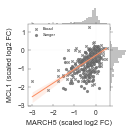

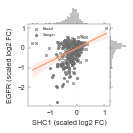

In [48]:
for gene_x, gene_y in [("MARCH5", "MCL1"), ("SHC1", "EGFR")]:
    plot_df = pd.concat(
        [
            assoc.crispr.loc[gene_x].rename(gene_x),
            assoc.crispr.loc[gene_y].rename(gene_y),
            assoc.crispr_obj.institute.rename("Institute"),
        ],
        axis=1,
        sort=False,
    ).dropna()

    g = DTracePlot().plot_corrplot(gene_x, gene_y, "Institute", plot_df, add_hline=True)

    g.set_axis_labels(f"{gene_x} (scaled log2 FC)", f"{gene_y} (scaled log2 FC)")

    plt.gcf().set_size_inches(1.5, 1.5)
    plt.savefig(
        f"{rpath}/association_scatter_{gene_x}_{gene_y}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

PPI weighted network

In [49]:
ppi_examples = [
    ("Nutlin-3a (-)", 0.4, 1, ["RPL37", "UBE3B"]),
    ("AZD3759", 0.3, 1, None),
]
for d, t, o, e in ppi_examples:
    graph = assoc.ppi.plot_ppi(
        d,
        assoc.lmm_drug_crispr,
        assoc.ppi_string_corr,
        corr_thres=t,
        norder=o,
        fdr=0.05,
        exclude_nodes=e,
    )
    graph.write_pdf(f"{rpath}/association_ppi_{d}.pdf")

Kinobeads

In [52]:
catds = KinobeadCATDS(assoc=assoc).get_data()
catds.sort_values("catds").head(15)

,GeneSymbol,DRUG_NAME,catds,is_target,target,pval,fdr,signif
386,MET,Capmatinib,3.0,1,T,6.423195e-28,1.080253e-23,Yes
52,AAK1,Cerdulatinib,3.0,0,2,8.665641e-01,9.999805e-01,No
642,PAK6,PF-3758309,3.0,1,T,5.980440e-01,9.981864e-01,No
33,BMP2K,Cerdulatinib,3.0,0,-,6.606147e-01,9.999805e-01,No
510,FGFR1,AZD4547,3.0,1,T,1.318549e-09,6.023420e-06,Yes
1160,FLT3,Sunitinib,3.0,0,2,3.962483e-03,9.015639e-01,No
1478,BTK,Poziotinib,3.0,0,NaN,NaN,NaN,No
201,PTK2,PF-562271,3.0,1,T,2.797568e-02,9.476795e-01,No
13,EGFR,Poziotinib,3.0,1,T,3.843099e-09,2.154442e-05,Yes
606,PIM1,AZD1208,3.0,1,T,1.227298e-03,7.719695e-01,No


E3 ligases enrichment within the significant associated gene-products

In [53]:
e3_ligases = pd.read_excel(f"{dpath}/ubq/Definite Ligase List.xlsx")
plot_df = assoc.lmm_drug_crispr.query(f"fdr < {target.fdr}")
plot_df["ligase"] = plot_df["GeneSymbol"].isin(e3_ligases["Gene Symbol"]).astype(int)

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
background = set(assoc.lmm_drug_crispr["GeneSymbol"])
signature = set(e3_ligases["Gene Symbol"]).intersection(background)
sublist = set(plot_df["GeneSymbol"]).intersection(background)

In [55]:
pval, int_len = DTraceEnrichment.hypergeom_test(
    signature=signature, background=background, sublist=sublist
)
logger.log(logging.INFO, f"E3 ligases hypergeom: {pval:.2e} (intersection={int_len})")

[2019-02-26 09:01:30,221 - INFO]: E3 ligases hypergeom: 2.13e-01 (intersection=11)
